# Exam 4th of January 2024, 8.00-13.00 for the course 1MS041 (Introduction to Data Science / Introduktion till dataanalys)

## Instructions:
1. Complete the problems by following instructions.
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has 3 problems for a total of 40 points, to pass you need
20 points. The bonus will be added to the score of the exam and rounded afterwards.

## Some general hints and information:
* Try to answer all questions even if you are uncertain.
* Comment your code, so that if you get the wrong answer I can understand how you thought
this can give you some points even though the code does not run.
* Follow the instruction sheet rigorously.
* This exam is partially autograded, but your code and your free text answers are manually graded anonymously.
* If there are any questions, please ask the exam guards, they will escalate it to me if necessary.

## Tips for free text answers
* Be VERY clear with your reasoning, there should be zero ambiguity in what you are referring to.
* If you want to include math, you can write LaTeX in the Markdown cells, for instance `$f(x)=x^2$` will be rendered as $f(x)=x^2$ and `$$f(x) = x^2$$` will become an equation line, as follows
$$f(x) = x^2$$
Another example is `$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$` which renders as
$$f_{Y \mid X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha \cdot x + \beta)$$

## Finally some rules:
* You may not communicate with others during the exam, for example:
    * You cannot ask for help in Stack-Overflow or other such help forums during the Exam.
    * You may not communicate with AI's, for instance ChatGPT.
    * Your on-line and off-line activity is being monitored according to the examination rules.

## Good luck!

In [ ]:
# Insert your anonymous exam ID as a string in the variable below
examID="0045-YUM"


---
## Exam vB, PROBLEM 1
Maximum Points = 14


In this problem you will do rejection sampling from complicated distributions, you will also be using your samples to compute certain integrals, a method known as Monte Carlo integration: (Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection)

1. [4p] Fill in the remaining part of the function `problem1_inversion` in order to produce samples from the below distribution using rejection sampling:

$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        \frac{e^{x^2}-1}{e-1}, & 0 < x < 1 \\
        1, & x \geq 1
    \end{cases}
$$

2. [2p] Produce 100000 samples (**use fewer if it times-out and you cannot find a solution**) and put the answer in `problem1_samples` from the above distribution and plot the histogram together with the true density. *(There is a timeout decorator on this function and if it takes more than 10 seconds to generate 100000 samples it will timeout and it will count as if you failed to generate.)*
3. [2p] Use the above 100000 samples (`problem1_samples`) to approximately compute the integral

$$
    \int_0^{1} \sin(x) \frac{2e^{x^2} x}{e-1} dx
$$
and store the result in `problem1_integral`.

4. [2p] Use Hoeffdings inequality to produce a 95\% confidence interval of the integral above and store the result as a tuple in the variable `problem1_interval`

5. [4p] Fill in the remaining part of the function `problem1_inversion_2` in order to produce samples from the below distribution using rejection sampling:
$$
    F[x] = 
    \begin{cases}
        0, & x \leq 0 \\
        20xe^{20-1/x}, & 0 < x < \frac{1}{20} \\
        1, & x \geq \frac{1}{20}
    \end{cases}
$$
Hint: this is tricky because if you choose the wrong sampling distribution you reject at least 9 times out of 10. You will get points based on how long your code takes to create a certain number of samples, if you choose the correct sampling distribution you can easily create 100000 samples within 2 seconds.

In [2]:

# Part 1

import numpy as np
from Utils import timeout

def LCG(size=None, seed = 0):
    m,a,b = (2**32, 16777217,12349)
    lcg = []
    u = seed
    
    for s in range(size):
        u = (a*u + b) % m
        lcg.append(u)
    
    return lcg

def uniform_pseudo_random(generator=None, period = 1, size=None, seed=0):
    gen_list = generator(size, seed)
    uniform_pseudo_random = list(np.array(gen_list)/period)
    
    return uniform_pseudo_random

@timeout()
def problem1_inversion(n_samples=1):
    # Distribution from part 1
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    # Return a numpy array of length n_samples
    period = 2**32
    seed = 1
    uniform_sampler = lambda size,seed: uniform_pseudo_random(generator=LCG, period = period, size=size, seed=seed)
    samples = []
    rejections = 0
    while (len(samples) < n_samples):
        #x = uniform_sampler(1, 1)[0]
        x = np.random.uniform(0,1)# Teacher edit: trying to fix your sampling to test your algorithm
        y = (np.exp(x**2)-1)/(np.exp(1)-1)
        #z = uniform_sampler(1, 1)[0]
        z = np.random.uniform(0,1) # Teacher edit: trying to fix your sampling to test your algorithm
        if (z <= y):
            samples.append(x)
        else:
            rejections += 1
        seed += 1
    #print(samples, rejections)
    return samples

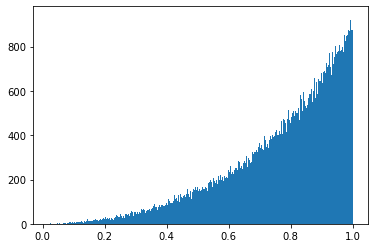

In [3]:
# Part 2
from matplotlib import pyplot as plt
problem1_samples = problem1_inversion(100000)
# print(problem1_samples)
_=plt.hist(problem1_samples,bins=400)


In [4]:
# Part 3

problem1_integral = XXX


NameError: name 'XXX' is not defined

In [5]:
# Part 4

problem1_interval = [XXX,XXX]


NameError: name 'XXX' is not defined

In [6]:
# Part 5

def problem1_inversion_2(n_samples=1):
    # Distribution from part 2
    # write the code in this function to produce samples from the distribution in the assignment
    # Make sure you choose a good sampling distribution to avoid unnecessary rejections

    # Return a numpy array of length n_samples
    return XXX

---
#### Local Test for Exam vB, PROBLEM 1
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [7]:

# This cell is just to check that you got the correct formats of your answer
import numpy as np
try:
    assert(isinstance(problem1_inversion(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray)) 
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float)) 
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)) , "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2) , "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray)) 
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")

Try again. You should return a numpy array from problem1_inversion
Try again. your problem1_samples is not a numpy array
Try again. your problem1_integral is not a float
name 'problem1_interval' is not defined
Try again. You should return a numpy array from problem1_inversion_2


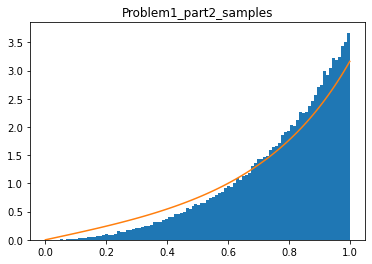

Beginning tests for problem 1

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
You are producing the correct number of samples when asking for 10
-----Ending test---------

-----Beginning test------

Your sampler produces samples that are too far away from the true distribution
You got 3.0 points deduction 
-----Ending test---------

Manual points: 2
You are using the distribution function to sample and not the density. Also your uniform sampler had some issues, so I replaced it with numpy's uniform sampler to test!
---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
You produced 100000 samples, good!
-----Ending test---------

-----Beginning test------

Your samples are too far away from the true distribution
You got 0.5 points deduction 
-----Ending test---------

Manual points: -1
No comment!
---------------------------------
Beginning test for 

---
## Exam vB, PROBLEM 2
Maximum Points = 13


Let us build a proportional model ($\mathbb{P}(Y=1 \mid X) = G(\beta_0+\beta \cdot X)$ where $G$ is the logistic function) for the spam vs not spam data. Here we assume that the features are presence vs not presence of a word, let $X_1,X_2,X_3$ denote the presence (1) or absence (0) of the words $("free", "prize", "win")$.

1. [2p] Load the file `data/spam.csv` and create two numpy arrays, `problem2_X` which has shape (n_emails,3) where each feature in `problem2_X` corresponds to $X_1,X_2,X_3$ from above, `problem2_Y` which has shape **(n_emails,)** and consists of a $1$ if the email is spam and $0$ if it is not. Split this data into a train-calibration-test sets where we have the split $40\%$, $20\%$, $40\%$, put this data in the designated variables in the code cell.

2. [4p] Follow the calculation from the lecture notes where we derive the logistic regression and implement the final loss function inside the class `ProportionalSpam`. You can use the `Test` cell to check that it gives the correct value for a test-point.

3. [4p] Train the model `problem2_ps` on the training data. The goal is to calibrate the probabilities output from the model. Start by creating a new variable `problem2_X_pred` (shape `(n_samples,1)`) which consists of the predictions of `problem2_ps` on the calibration dataset. Then train a calibration model using `sklearn.tree.DecisionTreeRegressor`, store this trained model in `problem2_calibrator`.

4. [3p] Use the trained model `problem2_ps` and the calibrator `problem2_calibrator` to make final predictions on the testing data, store the prediction in `problem2_final_predictions`. Compute the $0-1$ test-loss and store it in `problem2_01_loss` and provide a $99\%$ confidence interval of it, store this in the variable `problem2_interval`, this should again be a tuple as in **problem1**.

In [9]:
# Part 1
import numpy as np
from Utils import train_test_validation

def load_sms():
    import csv
    lines = []
    hamspam = {'ham': 0, 'spam': 1}
    with open('data/spam.csv', mode='r',encoding='latin-1') as f:
        reader = csv.reader(f)
        header = next(reader)
        lines = [(line[1],hamspam[line[0]]) for line in reader]
        
    return lines
spam_no_spam = load_sms()
# print(spam_no_spam)
X = []
Y = []
n_emails = len(spam_no_spam)

for s in spam_no_spam:
    free_count, prize_count, win_count = 0, 0, 0
    if(s[0].lower().find('free') != -1):
        free_count += 1
    if(s[0].lower().find('prize') != -1):
        prize_count += 1
    if(s[0].lower().find('win') != -1):
        win_count += 1
    X.append([free_count, prize_count, win_count])
    Y.append(s[1])
#print(X)
#print(Y)
problem2_X = np.array(X)
problem2_Y = np.array(Y)
#print(n)
#print(problem2_X)
#print(problem2_Y)

X_train, X_test, X_calib, Y_train, Y_test, Y_calib = train_test_validation(problem2_X, problem2_Y, test_size=0.4, validation_size=0.2, random_state=0)
problem2_X_train = X_train
problem2_X_calib = X_calib
problem2_X_test = X_test

problem2_Y_train = Y_train
problem2_Y_calib = Y_calib
problem2_Y_test = Y_test

print(problem2_X_train.shape,problem2_X_calib.shape,problem2_X_test.shape,problem2_Y_train.shape,problem2_Y_calib.shape,problem2_Y_test.shape)


(2228, 3) (1115, 3) (2229, 3) (2228,) (1115,) (2229,)


In [10]:
# Part 2

class ProportionalSpam(object):
    def __init__(self):
        self.coeffs = None
        self.result = None
    
    # define the objective/cost/loss function we want to minimise
    def loss(self,X,Y,coeffs):
        # G(x) is of the form e^(beta0 + beta.x)/(1+e^(beta0 + beta.x))
        # Loss function is of the form: sum for i=1 to m, yi*log(P(y=1)) + (1-yi)*log(P(y=0))
        # where P(y=1) = G(x) and P(y=0) = 1 - G(x)
        G = np.exp(np.dot(X, coeffs[1:])+coeffs[0])/(1+np.exp(np.dot(X,coeffs[1:])+coeffs[0]))
        return -(np.log(G)*Y + np.log(1-G)*(1-Y)).mean()

    def fit(self,X,Y):
        import numpy as np
        from scipy import optimize

        #Use the f above together with an optimization method from scipy
        #to find the coefficients of the model
        opt_loss = lambda coeffs: self.loss(X,Y,coeffs)
        initial_arguments = np.zeros(shape=X.shape[1]+1)
        self.result = optimize.minimize(opt_loss, initial_arguments,method='cg')
        self.coeffs = self.result.x
    
    def predict(self,X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            G = lambda x: np.exp(x)/(1+np.exp(x))
            return np.round(10*G(np.dot(X,self.coeffs[1:])+self.coeffs[0]))/10 # This rounding is to help you with the calibration


In [11]:
# Part 3

problem2_ps = ProportionalSpam()
problem2_ps.fit(problem2_X_train, problem2_Y_train)

#from Utils import makeEDF,plotEDF
#edf = makeEDF(problem2_ps.predict(problem2_X_calib)-problem2_Y_calib)
#plotEDF(edf)

problem2_X_pred = problem2_ps.predict(problem2_X_calib).reshape((-1,1))
#print(problem2_X_pred.shape)

from sklearn.tree import DecisionTreeRegressor
problem2_calibrator = DecisionTreeRegressor()
problem2_calibrator.fit(problem2_X_pred, problem2_Y_calib)

calibration_residual = (problem2_calibrator.predict(problem2_X_pred)-problem2_X_pred)
#print(np.sqrt(np.mean(calibration_residual**2)))
#
#print(np.sqrt(np.mean((problem2_Y_test-problem2_X_pred)**2)))

In [12]:
# Part 4
X_train, X_test, X_calib, Y_train, Y_test, Y_calib = train_test_validation(problem2_X, problem2_Y, test_size=0.4, validation_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)

problem2_ps = ProportionalSpam()
problem2_ps.fit(sc.transform(X_train), Y_train)
# These are the predicted probabilities
problem2_final_predictions = problem2_ps.predict(X_test)

# print(sum(problem2_Y_test))
# print(sum(problem2_final_predictions))
predicted_decisions = problem2_final_predictions

# In order to compute this loss we first need to convert the predicted probabilities to a decision
# recall the Bayes classifier?
#problem2_01_loss = XXX

# Recall the interval is given as a tuple (a,b) or a list [a,b]
#problem2_interval = XXX

---
#### Local Test for Exam vB, PROBLEM 2
Evaluate cell below to make sure your answer is valid.                             You **should not** modify anything in the cell below when evaluating it to do a local test of                             your solution.

In [13]:
try:
    import numpy as np
    test_instance = ProportionalSpam()
    test_loss = test_instance.loss(np.array([[1,0,1],[0,1,1]]),np.array([1,0]),np.array([1.2,0.4,0.3,0.9]))
    assert (np.abs(test_loss-1.2828629432232497) < 1e-6)
    print("Your loss was correct for a test point")
except:
    print("Your loss was not correct on a test point")

Your loss was correct for a test point


Beginning tests for problem 2

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
problem2_X has the correct shape
-----Ending test---------

-----Beginning test------
problem2_Y has the correct shape
-----Ending test---------

-----Beginning test------
problem2_X_train has the correct number of features
-----Ending test---------

-----Beginning test------
problem2_X_calib has the correct number of features
-----Ending test---------

-----Beginning test------
problem2_X_test has the correct number of features
-----Ending test---------

-----Beginning test------
problem2_Y_train has the correct shape
-----Ending test---------

-----Beginning test------
problem2_Y_calib has the correct shape
-----Ending test---------

-----Beginning test------
problem2_Y_test has the correct shape
-----Ending test---------

Manual points: 0
No comment!
---------------------------------
Beginning test for part2
--------------------------

---
## Exam vB, PROBLEM 3
Maximum Points = 13


Consider the following four Markov chains, answer each question for all chains:

<img width="400px" src="pictures/MarkovA.png">Markov chain A</img>
<img width="400px" src="pictures/MarkovB.png">Markov chain B</img>
<img width="400px" src="pictures/MarkovC.png">Markov chain C</img>
<img width="400px" src="pictures/MarkovD.png">Markov chain D</img>

1. [2p] What is the transition matrix?
2. [2p] Is the Markov chain irreducible?
3. [3p] Is the Markov chain aperiodic? What is the period for each state?
4. [3p] Does the Markov chain have a stationary distribution, and if so, what is it?
5. [3p] Is the Markov chain reversible?

In [15]:
# PART 1

#------------------------TRANSITION MATRIX -------------------------------
# Answer each one by supplying the transition matrix as a numpy array
# of shape (n_states,n_states), where state (A,B,...) corresponds to index (0,1,...)

problem3_A    = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0, 0, 0.8, 0.2]])
problem3_B    = np.array([[0, 0.2, 0, 0.8], [0, 0, 1, 0], [0, 1, 0, 0], [0.5, 0, 0.5, 0]])
problem3_C    = np.array([[0.2, 0.3, 0, 0, 0.5], [0.2, 0.2, 0.6, 0, 0], [0, 0.4, 0, 0.6, 0], [0, 0, 0, 0.6, 0.4], [0, 0, 0, 0.4, 0.6]])
problem3_D    = np.array([[0.8, 0.2, 0, 0], [0.6, 0.2, 0.2, 0], [0, 0.4, 0, 0.6], [0.1, 0, 0.7, 0.2]])
#print(problem3_A)
#print(problem3_B)
#print(problem3_C)
#print(problem3_D)

In [16]:
# PART 2
#------------------------REDUCIBLE -------------------------------
# Answer each one with a True or False

problem3_A_irreducible = True
problem3_B_irreducible = False
problem3_C_irreducible = False
problem3_D_irreducible = True


In [17]:
# PART 3
#------------------------APERIODIC-------------------------------
# Answer each one with a True or False

problem3_A_is_aperiodic = True
problem3_B_is_aperiodic = False
problem3_C_is_aperiodic = True
problem3_D_is_aperiodic = True

# Answer the following with the period of the states as a numpy array
# of shape (n_states,)

problem3_A_periods = np.array([1, 1, 1, 1])
problem3_B_periods = np.array([2, 2, 2, 2])
problem3_C_periods = np.array([1, 1, 1, 1, 1])
problem3_D_periods = np.array([1, 1, 1, 1])


In [18]:
# PART 4
#------------------------STATIONARY DISTRIBUTION-----------------
# Answer each one with a True or False

problem3_A_has_stationary = True
problem3_B_has_stationary = False
problem3_C_has_stationary = False
problem3_D_has_stationary = True

# Answer the following with the stationary distribution as a numpy array of shape (n_states,)
# if the Markov chain has a stationary distribution otherwise answer with False

steps = 10**3
transition_matrix = problem3_A
for i in range(steps):
    transition_matrix = np.matmul(problem3_A, transition_matrix)
problem3A_stationary = np.around(transition_matrix[0], 4)
#print(problem3A_stationary)

transition_matrix = problem3_D
for i in range(steps):
    transition_matrix = np.matmul(problem3_D, transition_matrix)
problem3D_stationary = np.around(transition_matrix[0], 4)
#print(problem3D_stationary)

problem3_A_stationary_dist = problem3A_stationary
problem3_B_stationary_dist = False
problem3_C_stationary_dist = False
problem3_D_stationary_dist = problem3D_stationary



In [19]:
# PART 5
#------------------------REVERSIBLE-----------------
# Answer each one with a True or False

problem3_A_is_reversible = False
problem3_B_is_reversible = False
problem3_C_is_reversible = False
problem3_D_is_reversible = False

Beginning tests for problem 3

---------------------------------
Beginning test for part1
---------------------------------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_A: deduced_points 0.00
-----Ending test---------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_B: deduced_points 0.00
-----Ending test---------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_C: deduced_points 0.00
-----Ending test---------

-----Beginning test------
You get a deduction for each mistake in the transition matrix_D: deduced_points 0.00
-----Ending test---------

Manual points: 0
No comment!
---------------------------------
Beginning test for part2
---------------------------------

-----Beginning test------
Correct answer for Markov chain_A
-----Ending test---------

-----Beginning test------
Correct answer for Markov chain_B
-----Ending test---------

-----Beginning test------
